In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import drive

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/A_Z Handwritten Data.csv').astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

x = dataset.drop('label', axis = 1)
y = dataset['label']

train_images, test_images, train_labels, test_labels = train_test_split(x, y)

In [5]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(train_images)

train_images = minMaxScaler.transform(train_images)
test_images = minMaxScaler.transform(test_images)

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

In [6]:
from keras import models
from keras import layers

In [7]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=256)

Epoch 1/5
1092/1092 [==============================] - 5s 5ms/step - loss: 0.2588 - accuracy: 0.9272
Epoch 2/5
1092/1092 [==============================] - 5s 5ms/step - loss: 0.0819 - accuracy: 0.9772
Epoch 3/5
1092/1092 [==============================] - 5s 5ms/step - loss: 0.0606 - accuracy: 0.9829
Epoch 4/5
1092/1092 [==============================] - 5s 5ms/step - loss: 0.0496 - accuracy: 0.9861
Epoch 5/5
1092/1092 [==============================] - 5s 5ms/step - loss: 0.0423 - accuracy: 0.9880


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

2910/2910 [==============================] - 7s 2ms/step - loss: 0.0607 - accuracy: 0.9877


In [11]:
train_images = train_images.reshape(train_images.shape[0], 28, 28).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28).astype('float32')

In [12]:
origin_my_image = test_images[0]

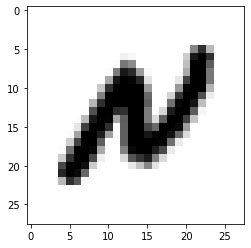

In [13]:
myDigit = origin_my_image
plt.imshow(myDigit, cmap=plt.cm.binary)

In [15]:
img = cv2.imread('alphabetEB.jpg')
resize_img = cv2.resize(img,(28,28))
img2 = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY)
img2.shape

(28, 28)

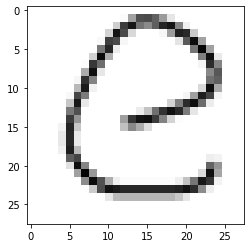

In [16]:
plt.imshow(img_data)

In [17]:
img2 = img2 / 255.0

In [22]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [21]:
img2

array([[[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.99607843],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.69803923],
        [0.00392157],
        [0.00392157],
        [0.        ],
        

In [18]:
img2 = img2.reshape(28, 28, 1).astype('float32')
img2.shape

(28, 28, 1)

In [19]:
output = model.predict(img2)
print("결과는 : ", np.argmax(output))

ValueError: ignored

In [ ]:
output